# Iris Flower dataset
 Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]



3 flowers of Iris species. [see images on wikipedia link above]

1936 by Ronald Fisher.

Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg

Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.



In [12]:
import numpy as np
import pandas as pd

In [14]:
!wget https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

--2022-01-23 19:02:12--  https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[=====================>]   3.63K  --.-KB/s   in 0s     

2022-01-23 19:02:12 (32.8 MB/s) - ‘iris.csv’ saved [3716/3716]



In [17]:
data = pd.read_csv("iris.csv")

# Dataset Exploration

In [27]:
# (Q) how many data-points and features?
data.shape

(150, 5)

In [30]:
#(Q) What are the column names in our dataset?
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [32]:
#(Q) Check datatypes of all columns
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [34]:
#(Q) Checking for the counts of each class in the target variable

# As the no of records for each species is same - Balanced Dataset

data.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

# 2-D Scatter Plot

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

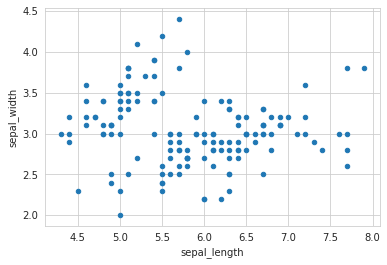

In [100]:
q = data.plot(kind = 'scatter', x = "sepal_length", y = "sepal_width")
plt.show()

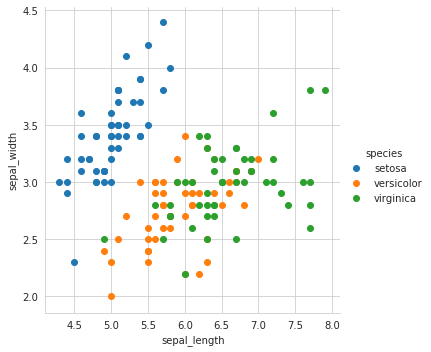

In [101]:
# 2-D Scatter plot with color-coding for each flower type/class.


sns.set_style('whitegrid')

sns.FacetGrid(data = data, hue = "species", size = 5).map(plt.scatter, "sepal_length",  "sepal_width").add_legend()

plt.show()

# Observations

 Notice that the blue points can be easily seperated  from red and green by drawing a line.  But red and green data points cannot be easily seperated.


1) Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.

2) Seperating Versicolor from Viginica is much harder as they have considerable overlap.

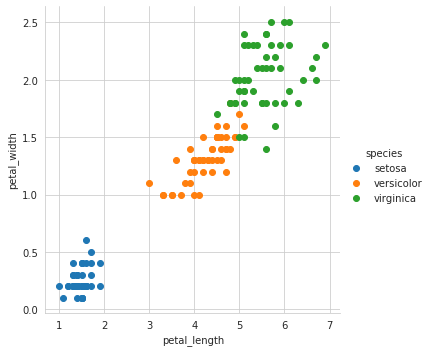

In [102]:
# Scatter Plot for petal dimensions

sns.set_style("whitegrid")

sns.FacetGrid(data = data, hue = "species",size =5 ).map(plt.scatter, "petal_length",  "petal_width") \
.add_legend()
plt.show()

# Pair-plot

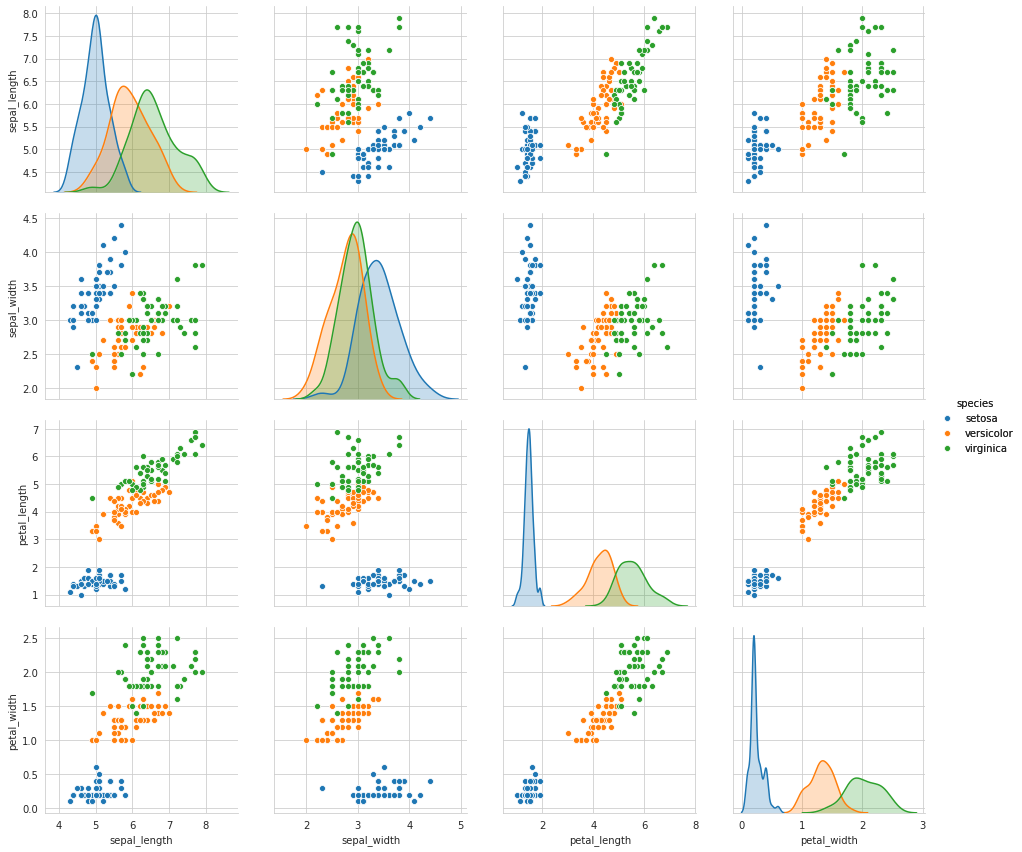

In [103]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data = data, hue = "species", size = 3).add_legend()
plt.show()

# **Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

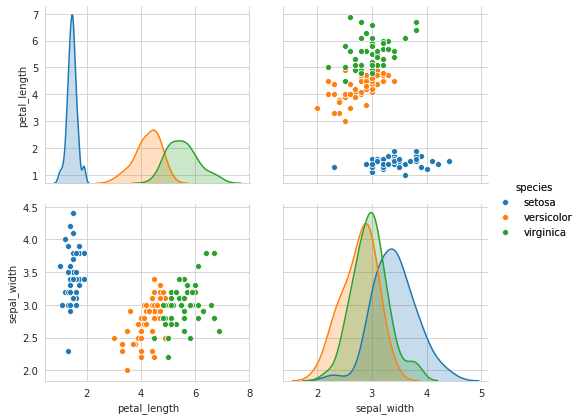

In [118]:

## Subsetting and applyting pairplots

sns.pairplot(data = data, hue = 'species', vars = ["petal_length","sepal_width"],size= 3).add_legend()

plt.show()

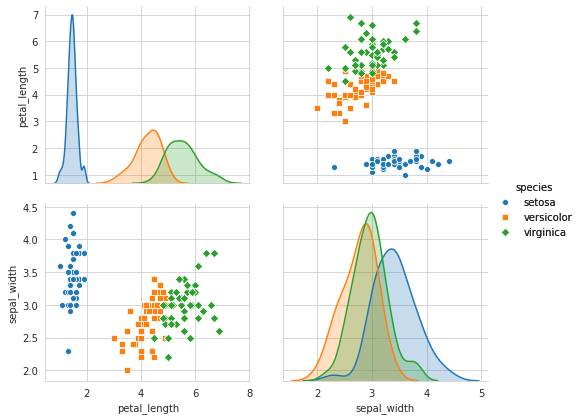

In [119]:
sns.pairplot(data = data, hue = 'species', vars = ["petal_length","sepal_width"], markers=['o','s','D'], size = 3).add_legend()

plt.show()

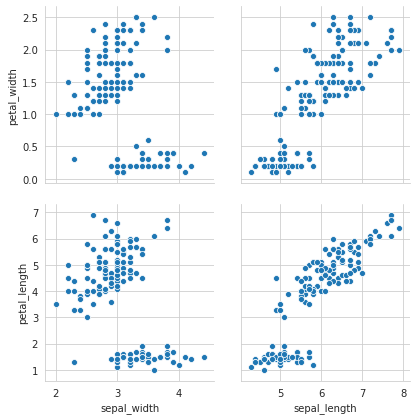

In [125]:
sns.set_style("whitegrid")
sns.pairplot(data = data, x_vars =["sepal_width","sepal_length"], y_vars =["petal_width","petal_length"],size = 3)
plt.show()

# Histogram, PDF, CDF

In [126]:
import numpy as np

In [129]:
iris_setosa = data[data.species == "setosa"]

In [130]:
iris_setosa

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [133]:
iris_virginica = data.loc[data["species"] == "virginica"];
iris_versicolor = data.loc[data["species"] == "versicolor"];

In [134]:
iris_virginica.head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


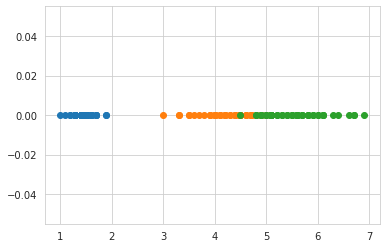

In [154]:
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.

plt.plot(iris_setosa["petal_length"],np.zeros(len(iris_setosa["petal_length"])), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()


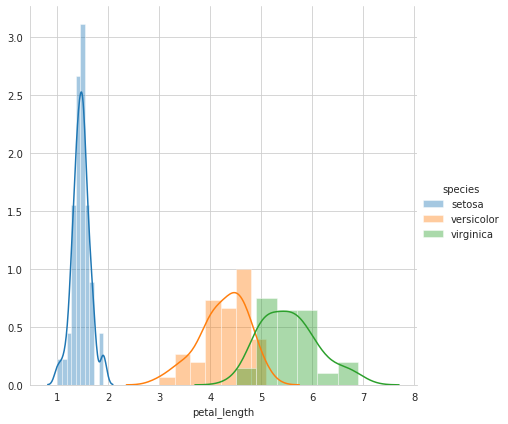

In [160]:
sns.FacetGrid(data = data, hue = 'species', size = 6).map(sns.distplot,"petal_length" ).add_legend()
plt.show()

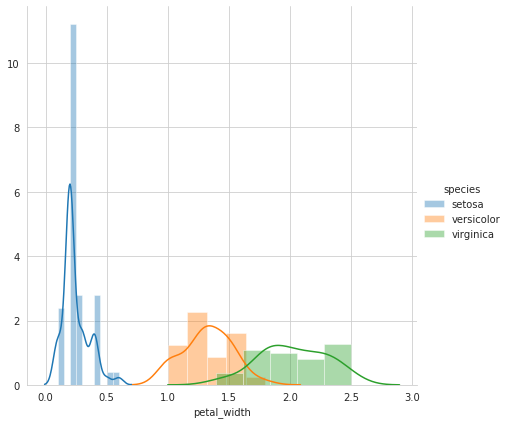

In [161]:
sns.FacetGrid(data = data, hue = "species", size = 6).map(sns.distplot, "petal_width").add_legend()
plt.show()

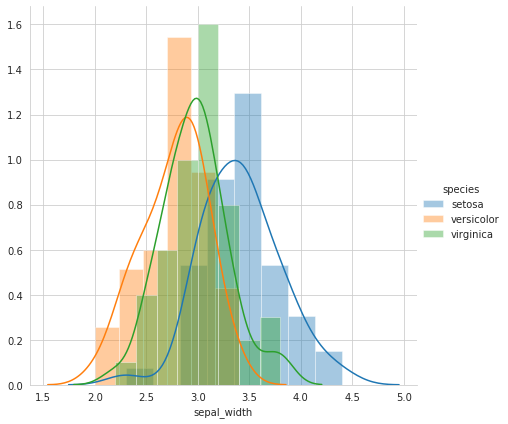

In [162]:
sns.FacetGrid(data = data, hue = "species", size = 6).map(sns.distplot, "sepal_width").add_legend()
plt.show()

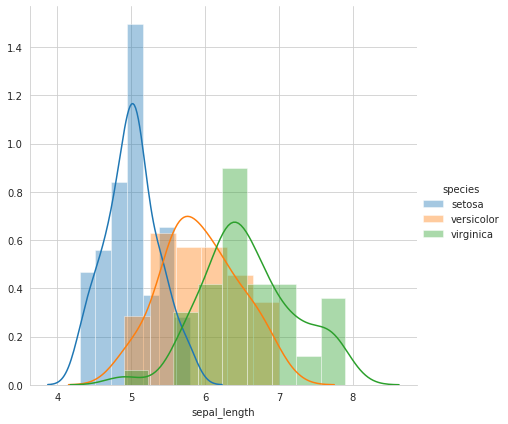

In [163]:
sns.FacetGrid(data = data, hue = "species", size = 6).map(sns.distplot, "sepal_length").add_legend()
plt.show()

The probability associated with an interval of values say (a,b) and it is symbolically represented as : P ( a < X < b ).This probability is the area under the curve of Probability Density Function ( PDF ) from a to b . So probabilities can be evaluated by integrating the PDF of the random variable . The above relationship defines the PDF .

In other words When the PDF is graphically portrayed, the area under the curve will indicate the interval in which the variable will fall. The total area in this interval of the graph equals the probability of a continuous random variable occurring. Now if we take any two values in this interval and try to find the area under the curve for that interval what we will receive will be the probability for the event to happen in that interval. The PDF is used to specify this probability of the random variable falling within a particular range of values, as opposed to taking on one value


"How can I use PDF while creating models ?"- Probability Density Function (PDF) is used for univariate analysis. Univariate analysis as the name suggests is a single variable analysis. So, PDF is very helpful when we have to dig deeper into a particular feature.
A histogram is a plot of the data you have collected. It can give you an idea about how the probability distribution of your measurement looks, but it cannot give you an accurate figure for the probability for how often your measurement falls some distance away from the mean, especially as you go further away from the mean.


For example, in our classroom we have 100 students. Since each student will have a unique height the probability for any value will be 0 which is not a very useful number for us as the height can take infinitesimal number of possibilities. In such cases we will use PDF where we will give an interval for which the probability will be computed. Here, if we want to find the probability of student with height of 103 to 107 we will get a probability of say 0.48 or 48%. Now this information is useful for the recipient if he would like to arrive at certain conclusion regarding his theory to check the height of students in that range.

Hence, For continuous random variables, the probability that X takes on any particular value x is 0. i.e. finding P(X = x) for a continuous random variable X is not going to work. Instead, we’ll need to find the probability that X falls in some interval (a, b), that is, we’ll need to find P(a < X < b). We’ll do that using a probability density function (PDF).

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


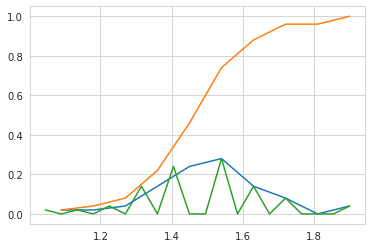

In [178]:
#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


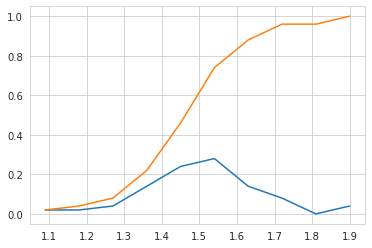

In [179]:
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


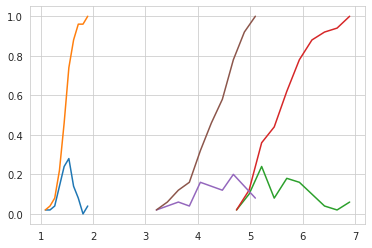

In [180]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# Mean, Variance and Std-dev

In [181]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))




Means:
1.464
2.4156862745098038
5.5520000000000005
4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


# Median, Percentile, Quantile, IQR, MAD

In [183]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))





Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8


# Median Absolute Deviation

In [184]:
from statsmodels import robust

print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# Box plot and Whiskers

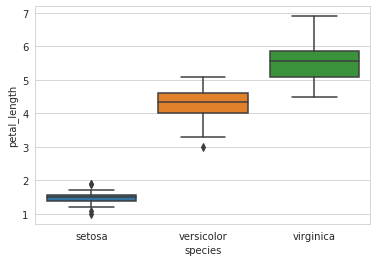

In [188]:

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x = 'species',y='petal_length', data=data)
plt.show()

# Violin plots

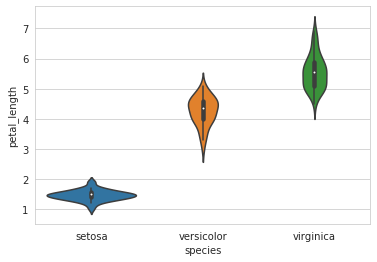

In [189]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=data, size=8)
plt.show()